In [78]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## EDA

In this task we do not have a familiar bunch of classes as labels but denoised pictures instead.  
Firstly, let us take a look at what our source and label pictures look like.

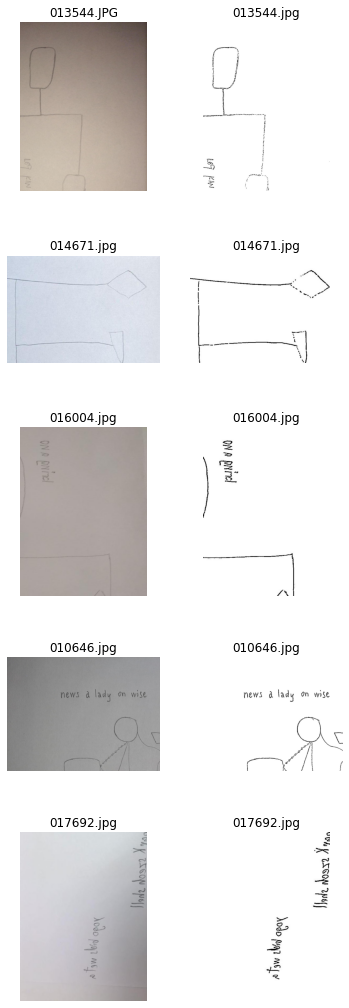

In [155]:
path = './data/AUTOENCODER/augmented_src/'
path_labels = './data/AUTOENCODER/augmented_labels/'

# print 5 source pictures with according label ones
rows, cols = 5, 2
fig, ax = plt.subplots(rows, cols, figsize=(6, 18))
ax = ax.ravel()

# get sorted pictures names lists
files_src = sorted(os.listdir(path))
files_labels = sorted(os.listdir(path_labels))

for i in np.arange(0, rows * cols, 2):
    # choose random picture from a list from as source as label lists
    rand = np.random.randint(0, len(files_src))
    item = files_src[rand]
    item_label = files_labels[rand]

    if os.path.isfile(os.path.join(path, item)):
        img_src = Image.open(path + item)
        img_label = Image.open(path_labels + item_label)

        ax[i].set_title(item)
        ax[i].imshow(img_src)
        ax[i].axis('off')

        ax[i+1].set_title(item_label)
        ax[i+1].imshow(img_label)
        ax[i+1].axis('off')

plt.show()

Then, get images number and all different image sizes in dataset.

In [29]:
sizes = {}
names = []

for item in os.listdir(path):
    if os.path.isfile(os.path.join(path, item)):
        # get file name
        names.append(item)
        img = Image.open(path + item)
        # get image size using its dimensions
        h, w, d = np.array(img).shape
        # add a list of all existed 2nd dimensions with the 1st one
        if h not in sizes:
            sizes[h] = list()
        if w not in sizes[h]:
            sizes[h].append(w)
        # skip if current resolution is already in dict
        else:
            continue

Do the same operations as above but this time get names and sizes of labels to compare with the source ones.

In [53]:
sizes_labels = {}
names_labels = []

for item in os.listdir(path_labels):
    if os.path.isfile(os.path.join(path_labels, item)):
        # get file name
        names_labels.append(item)
        img = Image.open(path_labels + item)
        # get image size using its dimensions
        h, w, d = np.array(img).shape
        # add a list of all existed 2nd dimensions with the 1st one
        if h not in sizes_labels:
            sizes_labels[h] = list()
        if w not in sizes_labels[h]:
            sizes_labels[h].append(w)
        else:
            continue

In [142]:
# how many pictures we have
print('There are {} source and {} label images in the dataset'.format(len(names), len(names_labels)))
# how many different sizes (by 1st dimension)
print('There are {} different image sizes only by 1st dimension for source and {} for label'.format(len(sizes), len(sizes_labels)))

There are 23104 source and 23104 label images in the dataset
There are 278 different image sizes only by 1st dimension for source and 278 for label


Make a see on what some of the pictures dimensions pairs are.

In [24]:
list(sizes.items())[:10]

[(1500, [2000, 1617]),
 (2312, [1736, 1603, 1672]),
 (1632, [1224, 760]),
 (441, [365, 640, 364]),
 (1736, [2312, 2286]),
 (1224, [1632]),
 (480, [640]),
 (640,
  [471,
   480,
   492,
   472,
   447,
   420,
   464,
   433,
   455,
   462,
   380,
   446,
   453,
   458,
   439,
   448,
   449,
   431,
   451,
   481,
   416,
   460,
   469,
   454,
   505,
   475,
   450,
   504,
   491,
   452,
   461,
   445,
   463,
   474,
   432,
   242,
   479,
   430,
   443,
   567,
   414,
   435,
   444,
   441,
   509,
   488,
   415,
   487,
   900,
   413,
   442,
   591,
   355,
   440,
   473,
   467,
   470,
   429]),
 (900,
  [761,
   647,
   706,
   615,
   748,
   674,
   643,
   699,
   588,
   634,
   725,
   665,
   563,
   640,
   635,
   717,
   617,
   584,
   644,
   612,
   658,
   609,
   624,
   631,
   625,
   633,
   623,
   645,
   636]),
 (2080, [1560, 1326, 1210, 1209])]

Check source-label file names pairs.

In [157]:
print(names[:20])
print(names_labels[:20])

['000000.jpg', '000001.jpg', '000002.jpg', '000003.jpg', '000004.jpg', '000005.jpg', '000006.jpg', '000007.jpg', '000008.jpg', '000009.jpg', '000010.jpg', '000011.jpg', '000012.jpg', '000013.jpg', '000014.jpg', '000015.jpg', '000016.jpg', '000017.jpg', '000018.jpg', '000019.jpg']
['000000.jpg', '000001.jpg', '000002.jpg', '000003.jpg', '000004.jpg', '000005.jpg', '000006.jpg', '000007.jpg', '000008.jpg', '000009.jpg', '000010.jpg', '000011.jpg', '000012.jpg', '000013.jpg', '000014.jpg', '000015.jpg', '000016.jpg', '000017.jpg', '000018.jpg', '000019.jpg']


Looks good, but check whether all source-label names are the same.

In [144]:
names.sort()
names_labels.sort()

In [156]:
names_diff = {}

for i in range(len(names)):
    if names[i] != names_labels[i]:
        names_diff[names[i]] = names_labels[i]

See how many mismatching examples we have.

In [42]:
print(len(names_diff))

1760


Print out some of them to find out the mismatch reason.

In [45]:
print(list(names_diff.items())[:20])

[('000960.JPG', '000960.jpg'), ('000961.JPG', '000961.jpg'), ('000962.JPG', '000962.jpg'), ('000963.JPG', '000963.jpg'), ('000964.JPG', '000964.jpg'), ('000965.JPG', '000965.jpg'), ('000966.JPG', '000966.jpg'), ('000967.JPG', '000967.jpg'), ('000968.JPG', '000968.jpg'), ('000969.JPG', '000969.jpg'), ('000970.JPG', '000970.jpg'), ('000971.JPG', '000971.jpg'), ('000972.JPG', '000972.jpg'), ('000973.JPG', '000973.jpg'), ('000974.JPG', '000974.jpg'), ('000975.JPG', '000975.jpg'), ('000976.JPG', '000976.jpg'), ('000977.JPG', '000977.jpg'), ('000978.JPG', '000978.jpg'), ('000979.JPG', '000979.jpg')]


Based on above, we can assume that image names discrepancy is caused by the pictures format in capital letters. This would cause errors while data loading so I will have to handle it.  

Now check whether our label images have the same shape as the source ones.  
Firstly sort both dictionaries with pictures sizes and then compare them.

In [146]:
sizes_sorted = {x: sorted(sizes[x]) for x in sizes.keys()}
sizes_labels_sorted = {x: sorted(sizes_labels[x]) for x in sizes_labels.keys()}

In [147]:
sizes_sorted == sizes_labels_sorted

True

Fortunately, all source-label pairs have the same resolutions but the issue is that pictures in general have so many different resolutions.  
As for solving I can shrink images to the chosen resolution or crop random image part with, again, the chosen resolution.